In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

https://en.wikipedia.org/wiki/Ordinary_least_squares


__Linear Modeling Function:__

</br>

${\displaystyle y_{i}=\beta _{1}x_{i1}+\beta _{2}x_{i2}+\cdots +\beta _{p}x_{ip}+\varepsilon _{i}}$

</br>

As a rule, the constant term is always included in the set of regressors $X$, say, by taking $x_{i1} = 1$ for all observations $i = 1, …, n$. The coefficient $\beta_1$ corresponding to this regressor is called the intercept.



__In Vector Form:__

</br>

${\displaystyle y_{i}=x_{i}^{T}\beta +\varepsilon _{i}\,}$

the $ε_i$'s are unobserved scalar random variables (errors) which account for influences upon the responses yi from sources other than the explanators $x_i$. 
$x_{i}$ is a column vector of the ith observations of all the explanatory variables.

__In Matrix Form:__

</br>

${\displaystyle {\hat {\boldsymbol {\beta }}}=(\mathbf {X} ^{\mathsf {T}}\mathbf {X} )^{-1}\mathbf {X} ^{\mathsf {T}}\mathbf {y}}$



${\displaystyle \mathbf {X} ={\begin{bmatrix}X_{11}&X_{12}&\cdots &X_{1p}\\X_{21}&X_{22}&\cdots &X_{2p}\\\vdots &\vdots &\ddots &\vdots \\X_{N1}&X_{N2}&\cdots &X_{Np}\end{bmatrix}},\qquad {\boldsymbol {\beta }}={\begin{bmatrix}\beta _{1}\\\beta _{2}\\\vdots \\\beta _{p}\end{bmatrix}},\qquad \mathbf {y} ={\begin{bmatrix}y_{1}\\y_{2}\\\vdots \\y_{N}\end{bmatrix}}.}$


N is the number of observations and p is the number of features, predictors, independent variables, regressors, etc...
The terms representing the variables in the training data set have many names. 

$\beta$ is the coefficient vector.

$y$ is the response vector, or vector of dependent variables. When you are training a model, $y$ is the response that that model should be able to closely predict.  

#### The below notes are from Wikipedia, so make sure they match the book. 

Suppose $\beta$ is a "candidate" value for the parameter vector $\boldsymbol{\beta}$. The quantity $y_i − x_i^T \beta$, called the residual for the _i_th observation, measures the vertical distance between the data point ($x_i$, $y_i$) and the hyperplane $y = x^T \beta$, and thus assesses the degree of fit between the actual data and the model. The sum of squared residuals (SSR) (also called the error sum of squares (ESS) or residual sum of squares (RSS)) is a measure of the overall model fit:


${\displaystyle RSS(\beta)=\sum _{i=1}^{N}(y_{i}-x_{i}^{\mathrm {T} }\beta)^{2} = (\boldsymbol{y}-\boldsymbol{X}\beta)^{\mathrm {T} }(\boldsymbol{y}-\boldsymbol{X}\beta)}$

The goal is to find the set of coefficients $\beta$ that minimize the residual sum of squares (RSS). 



${\displaystyle RSS(\beta)= (\boldsymbol{y}-\boldsymbol{X}\beta)^{\mathrm {T} }(\boldsymbol{y}-\boldsymbol{X}\beta)}$

${\displaystyle {\hat {\boldsymbol {\beta }}}=(\mathbf {X} ^{\mathsf {T}}\mathbf {X} )^{-1}\mathbf {X} ^{\mathsf {T}}\mathbf {y}}$

```


```

### read in data

In [2]:
data = pd.read_csv('http://www-bcf.usc.edu/~gareth/ISL/Advertising.csv', index_col=0)
data.head()

,TV,radio,newspaper,sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


**We will only perform a linear model fit between Sales and TV**

In [3]:
xdata = np.asarray(data.TV)
ydata = np.asarray(data.sales)

Text(0, 0.5, 'Sales')

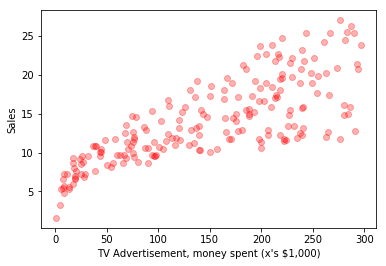

In [4]:
plt.plot(xdata, ydata, 'ro', alpha=0.3)
plt.xlabel('TV Advertisement, money spent (x\'s $1,000)')
plt.ylabel('Sales')

### Features matrix (X) and response matrix (y)

In [5]:
X = np.matrix([ np.ones(len(xdata)), xdata ]).T  # shape(200, 2)
y = ydata

print(X.shape)            # (200, 2)
print(y.shape)            # (200, )
print(np.vstack(y).shape) # (200, 1)

(200, 2)
(200,)
(200, 1)


### Multiplication of Matrices and dot product
Wanted to point out, before beginning, that 
`X * X.T`
and
`np.dot(X, X.T)`
are the exact same result. 



In [6]:
X * X.T == np.dot(X, X.T)

matrix([[ True,  True,  True, ...,  True,  True,  True],
        [ True,  True,  True, ...,  True,  True,  True],
        [ True,  True,  True, ...,  True,  True,  True],
        ...,
        [ True,  True,  True, ...,  True,  True,  True],
        [ True,  True,  True, ...,  True,  True,  True],
        [ True,  True,  True, ...,  True,  True,  True]])

In [7]:
X.T * np.vstack(y) == np.dot(X.T, np.vstack(y))

matrix([[ True],
        [ True]])

### Estimates of $\beta_0$ and $\beta_1$ contained in a single matrix.

In [8]:
# ESTIMATE FOR COEFFICIENTS. 
beta = ((X.T * X)**-1) * X.T * np.vstack(y) # equation 3.6
print('')
print(beta)


[[7.03259355]
 [0.04753664]]


### $\hat{y}$ estimates, given the linear model.

In [9]:
# y estimates given the linear model.
y_hat = X * ((X.T * X)**-1) * X.T * np.vstack(y)  # or X * beta. equation 3.7 

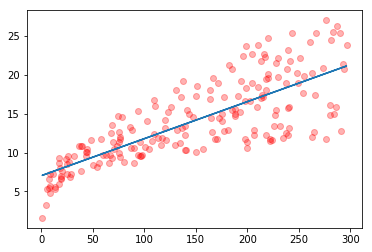

In [10]:
# xdata and estimates for y given the model.
plt.plot(xdata, y, 'ro', alpha=0.3)  # data for y
plt.plot(xdata, y_hat)  # model estimate for y

### Residual Sum of Squares (RSS)
These are the squared differences between the true y-data values and the estimated y values given the model. 

**Keep in mind, the variables y and ydata are the same thing; the y-axis data of the data points. We just gave it two names.**

In [11]:
# y_hat is in matrix form, make y_hat into a flattened array.
y_hat_arr = np.asarray(y_hat.flatten())

residuals = (y - y_hat_arr ) # vertical distances between the model and the y-data

In [12]:
# RSS = sum(residuals**2)
RSS = np.sum( (y - y_hat_arr )**2 )
print(RSS)

2102.5305831313503


In [13]:
# RSS IN MATRIX FORMAT
((np.vstack(y) - X * beta).T) * (np.vstack(y) - X * beta)  # equation 3.3

matrix([[2102.53058313]])

### Plot with $\hat{y}$ and residuals.

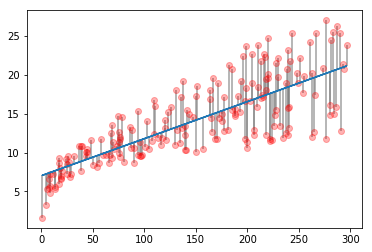

In [14]:
plt.plot(xdata, y, 'ro', alpha=0.3)  # data for y
plt.plot(xdata, y_hat)  # model estimate for y
plt.vlines(xdata, y, y-residuals, color='grey', alpha=0.75)

In [15]:
residuals

array([[ 4.12922549,  1.25202595,  1.44977624,  4.26560543, -2.72721814,
        -0.24616232,  2.03404963,  0.45350227, -2.64140866, -5.93041431,
        -1.57476548,  0.16128975,  1.03603441, -1.96741599,  2.26517814,
         6.07874691,  2.24442223,  3.99059583,  0.97787093,  0.56525932,
         0.58540418, -5.81779199, -2.0600772 , -2.38520856, -0.29412625,
        -7.52997632,  1.17442053, -2.54614092,  0.04029031,  0.11131964,
         0.44392447, -0.49948025, -2.053155  , -2.25832525, -2.08185004,
        -8.05149492,  5.67987712,  4.11641941,  1.01857725,  3.62905243,
        -0.05876324,  1.65342109, -0.28935118, -3.96792445,  0.27423678,
        -0.45625929, -0.6966302 ,  4.76336641, -3.03291826, -0.51279479,
        -5.13041431, -1.10527225,  5.28047746,  5.48721591,  0.67953101,
         7.21236867, -1.87961102, -0.30708398,  6.74668265,  1.35143631,
        -1.47580381,  4.74608231, -2.7081116 ,  2.08539348,  4.73535289,
        -1.01262174,  0.97000228, -0.25444756,  0.5

### First Derivative of the RSS

In [16]:
-2 * X.T * (np.vstack(y) - X*beta)   # equation 3.4

matrix([[3.95061761e-12],
        [5.38420863e-10]])

### Second Derivative of the RSS

In [17]:
2 * X * X.T     # equation 3.4

matrix([[105894.02,  20480.9 ,   7917.44, ...,  81457.4 , 130514.72,
         106814.42],
        [ 20480.9 ,   3962.5 ,   1532.8 , ...,  15755.  ,  25242.4 ,
          20658.9 ],
        [  7917.44,   1532.8 ,    593.68, ...,   6090.8 ,   9757.84,
           7986.24],
        ...,
        [ 81457.4 ,  15755.  ,   6090.8 , ...,  62660.  , 100396.4 ,
          82165.4 ],
        [130514.72,  25242.4 ,   9757.84, ..., 100396.4 , 160859.92,
         131649.12],
        [106814.42,  20658.9 ,   7986.24, ...,  82165.4 , 131649.12,
         107742.82]])

### Degrees of Freedom
n_observations - n_predictors - 1

In [18]:
N,p = X.shape  # number of observations, number of features (aka predictors)

degrees_of_freedom = N-p-1
print(degrees_of_freedom)

197


### Variance

In [21]:
sigma_squared = (1./(N-p-1)) * np.sum( (y - y_hat_arr )**2 )

print(sigma_squared)

10.672744076808884


In [22]:
# OR 
RSS/degrees_of_freedom

10.672744076808884

In [23]:
# sigma_squared IN MATRIX FORM:
(1./(N-p-1)) * ( ((np.vstack(y) - X * beta).T) * (np.vstack(y) - X * beta) ) 

matrix([[10.67274408]])

### Variance-Covariance Matrix

In [24]:
variance_beta = ((X.T * X)**-1) * sigma_squared  # equation 3.8
print(variance_beta)

[[ 2.10684220e-01 -1.06989815e-03]
 [-1.06989815e-03  7.27611510e-06]]


### Standard Error on the parameters. 0.459 is on $\beta_0$ and 0.0027 is on $\beta_1$

In [25]:
# standard error of the parameters are the diago elements of this matrix.
np.sqrt(variance_beta)

/Users/kimzoldak/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in sqrt
  


matrix([[0.45900351,        nan],
        [       nan, 0.00269743]])

In [26]:
SE_mat = np.sqrt(variance_beta)
print(SE_mat)

[[0.45900351        nan]
 [       nan 0.00269743]]


/Users/kimzoldak/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in sqrt
  """Entry point for launching an IPython kernel.


In [27]:
# get rid of the nans
standard_error = SE_mat[ ~np.isnan(SE_mat) ]
print(standard_error)

[[0.45900351 0.00269743]]


### Confidence Intervals
$1\sigma$, $2\sigma$, and $3\sigma$ confidence intervals are calculated using:

$\hat{\beta_0} \pm 1 \ SE(\hat{\beta_0})$ 

$\hat{\beta_0} \pm 2 \ SE(\hat{\beta_0})$ 

$\hat{\beta_0} \pm 3 \ SE(\hat{\beta_0})$ 

and 

$\hat{\beta_1} \pm 1 \ SE(\hat{\beta_1})$ 

$\hat{\beta_1} \pm 2 \ SE(\hat{\beta_1})$ 

$\hat{\beta_1} \pm 3 \ SE(\hat{\beta_1})$ 


where 2 is the z-score for a 95% confidence interval. 

In [28]:
beta

matrix([[7.03259355],
        [0.04753664]])

In [29]:
beta - 1*SE_mat, beta + 1*SE_mat, \
beta - 2*SE_mat, beta + 2*SE_mat, \
beta - 3*SE_mat, beta + 3*SE_mat

(matrix([[6.57359004,        nan],
         [       nan, 0.04483921]]), matrix([[7.49159706,        nan],
         [       nan, 0.05023407]]), matrix([[6.11458653,        nan],
         [       nan, 0.04214179]]), matrix([[7.95060056,        nan],
         [       nan, 0.0529315 ]]), matrix([[5.65558303,        nan],
         [       nan, 0.03944436]]), matrix([[8.40960407,        nan],
         [       nan, 0.05562892]]))

In [30]:
standard_error

matrix([[0.45900351, 0.00269743]])

In [31]:
np.asarray(beta.flatten())

array([[7.03259355, 0.04753664]])

In [32]:
beta.flatten() - 1*standard_error, beta.flatten() + 1*standard_error

(matrix([[6.57359004, 0.04483921]]), matrix([[7.49159706, 0.05023407]]))

In [33]:
beta.flatten() - 2*standard_error, beta.flatten() + 2*standard_error

(matrix([[6.11458653, 0.04214179]]), matrix([[7.95060056, 0.0529315 ]]))

In [34]:
beta.flatten() - 3*standard_error, beta.flatten() + 3*standard_error

(matrix([[5.65558303, 0.03944436]]), matrix([[8.40960407, 0.05562892]]))

### Residual Standard Error

In [35]:
RSE = np.sqrt(RSS/(N-2))
print(RSE)

3.258656368650462


### $R^2$ Statistic
$R^2 = \frac{TSS-RSS}{TSS} = 1-\frac{RSS}{TSS}$,

where

$TSS = \sum{(y_i - \bar{y})^2}$ is the total sum of squares. TSS measures the total variance int he response Y, and can be thought of as the amount of variability inherent in the response before regression in performed. In contrast, RSS measures the amount of variability that is left unexplained after performing the regression. Hence, TSS-RSS measures the amount of variability in the response that is explained (or removed) by performing the regression, and $R^2$ measures the proportion of variability in Y that can be explained using X. An $R^2$ close to 1 indicates a large proportion of the variability in the response has been explained by the regression. A number near 0 indicates the regression did not explain much of the variability in the response. This may occur when the linear model is wrong, the inherent error $\sigma^2$ is high, or both. 

In [36]:
TSS = np.sum((ydata - ydata.mean())**2)

In [37]:
R_squared = 1-(RSS/TSS)
print(R_squared)

0.6118750508500712


Just under 2/3rds of the variability in sales is explained by a linear regression on TV. 

### Adjusted $R^2$

In [38]:
R_squared_adjusted = 1 - ( (RSS/(N-p)) / (TSS/(N-1)) )
print(R_squared_adjusted)

0.6099148238341625


### Mean Squared Error

In [39]:
MSE = RSS/N
print(MSE)

10.512652915656751


### Root Mean Squared Error

In [40]:
RMSE = np.sqrt(RSS/N)
print(RMSE)

3.242322148654688


In [41]:
# THESE SHOULD BE VERY CLOSE IF NOT EXACTLY THE SAME.
print(RMSE, np.std(residuals))

3.242322148654688 3.242322148654688


In [42]:
RMSE == np.std(residuals)

True

### t-statistic
$t=\frac{\hat{\beta_0}-0}{\text{SE}(\hat{\beta_0})}$

and 

$t=\frac{\hat{\beta_1}-0}{\text{SE}(\hat{\beta_1})}$

In [43]:
SE_beta0 = np.asarray(standard_error)[0][0]
SE_beta1 = np.asarray(standard_error)[0][1]

beta0 = np.asarray(beta.flatten())[0][0]
beta1 = np.asarray(beta.flatten())[0][1]


In [44]:
tstat_beta0 = (beta0 - 0)/(SE_beta0)
print(tstat_beta0)

15.321437500906555


In [45]:
tstat_beta1 = (beta1 - 0)/(SE_beta1)
print(tstat_beta1)

17.62295390966407


### Common forms for the Log-Likelihood Equation of a Normal Distribution.

${\displaystyle \log {\Big (}{\mathcal {L}}(\mu ,\sigma ){\Big )}=-{\frac {\,n\,}{2}}\log(2\pi \sigma ^{2})-{\frac {1}{2\sigma ^{2}}}\sum _{i=1}^{n}(\,x_{i}-\mu \,)^{2}}$

$\ln(f) = -\frac{1}{2} n \ln(2 \pi) - n\ln \sigma - \frac{\sum(x_i - \mu)^2}{2\sigma^2}$

Unfortunately, these are confusing.

The $(x_i - \mu)^2$ appears to be the $ith$ element of the xdata and $\mu$ the mean of that data. However, this is wrong!! 

$(x_i - \mu)^2$ would be better written as $(y_i - \hat{y_i})$.

$y_i$ is the y-axis values of the real data.

$\hat{y_i}$ are the estimates of each $y_i$, given the linear model. 

Another confusing aspect of these equations; $\sigma$ is NOT the sigma we have been using. $\sigma$ is the standard deviation of the residuals; std($y_i - \hat{y_i}$). Instead of using $\sigma$, we will use $s$. 

We are trying to estimate the true model $f$ that produced the true datapoints ($x_i$, $y_i$). If we accurately estimate $f$ with no trend of overestimating or underestimating the dependent variable (i.e., no bias), then the differences between the true values and our estimates of them will be normally distributed about the model. Thus, ($y_i - \hat{y_i}$) will be normally distributed about the linear model. 

($y_i - \hat{y_i}$) are the vertical offsets between the model and the true data, since y is the dependent variable and the y-axis is the vertical axis. They are the fit residuals, or the errors of the fit. It should now make sense that $s=\text{std}(y_i - \hat{y_i}) = \text{std}(residuals)$ is also the standard deviation of the normal distribution that the data ($x_i$, $y_i$) are scattered about the true model $f$. 

*NOTE: Taking a look at the linear fit to the data we use in this notebook example, there is clearly a bias and the residuals are NOT normally distributed about the model. We will discuss that at a later time when covering the topic of bias.*

https://www.stat.cmu.edu/~cshalizi/mreg/15/lectures/06/lecture-06.pdf

### Log-Likelihood Equation we will use:

$\log (f) = -\frac{n}{2} \log(2 \pi) - n \log(s) - \frac{1}{2s^2}\sum_{i=1}^{n} (y_i - (\beta_0 + \beta_1 x_i))^2$

OR

$\log (f) = -\frac{n}{2} \log(2 \pi s^2) - \frac{1}{2s^2}\sum_{i=1}^{n} (y_i - (\beta_0 + \beta_1 x_i))^2$

Notice that $(\beta_0 + \beta_1 x_i)$ is $\hat{y_i}$, the estimates of the ydata. 

Thus,

$\sum_{i=1}^{n} (y_i - (\beta_0 + \beta_1 x_i))^2 \ \ \ = \ \ \ \sum_{i=1}^{n} (y_i - \hat{y_i})^2$, 

which is the residual sum of squares, the $RSS$.

In [46]:
s = np.std(residuals)
LOGLIKE = -0.5*N*np.log(2.0*np.pi*(s**2)) - (np.sum(residuals**2)/(2.0*(s**2)))
print(LOGLIKE)

-519.0456637681739


### AIC and BIC

In [47]:
AIC = -2.* LOGLIKE + 2.*p
print(AIC)
BIC = -2.* LOGLIKE + np.log(N)*p
print(BIC)

1042.0913275363478
1048.687962269444


[Projection Matrix](https://en.wikipedia.org/wiki/Projection_matrix)

[Identity Matrix](https://en.wikipedia.org/wiki/Identity_matrix)

${\displaystyle \mathbf {\hat {y}} =\mathbf {P} \mathbf {y} }$

$P = X(X^TX)^{−1}X^T$

In [48]:
projection_matrix = (X*(X.T*X)**-1) * X.T
print(projection_matrix)

[[ 0.00970307 -0.00080639 -0.00235223 ...  0.00669632  0.01273246
   0.00981632]
 [-0.00080639  0.01216855  0.01407704 ...  0.00290573 -0.00454647
  -0.00094621]
 [-0.00235223  0.01407704  0.01649363 ...  0.00234817 -0.00708804
  -0.00252927]
 ...
 [ 0.00669632  0.00290573  0.00234817 ...  0.00561184  0.00778897
   0.00673717]
 [ 0.01273246 -0.00454647 -0.00708804 ...  0.00778897  0.01771319
   0.01291866]
 [ 0.00981632 -0.00094621 -0.00252927 ...  0.00673717  0.01291866
   0.00993229]]


In [49]:
identity_matrix = np.identity(n=len(X))
print(identity_matrix)

[[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]


In [50]:
residual_maker_matrix = identity_matrix - projection_matrix
print(residual_maker_matrix)

[[ 9.90296933e-01  8.06390241e-04  2.35223176e-03 ... -6.69632041e-03
  -1.27324635e-02 -9.81631556e-03]
 [ 8.06390241e-04  9.87831451e-01 -1.40770397e-02 ... -2.90572873e-03
   4.54647245e-03  9.46206398e-04]
 [ 2.35223176e-03 -1.40770397e-02  9.83506370e-01 ... -2.34816864e-03
   7.08804007e-03  2.52927132e-03]
 ...
 [-6.69632041e-03 -2.90572873e-03 -2.34816864e-03 ...  9.94388165e-01
  -7.78897480e-03 -6.73716730e-03]
 [-1.27324635e-02  4.54647245e-03  7.08804007e-03 ... -7.78897480e-03
   9.82286809e-01 -1.29186589e-02]
 [-9.81631556e-03  9.46206398e-04  2.52927132e-03 ... -6.73716730e-03
  -1.29186589e-02  9.90067709e-01]]


M is the "residual maker matrix"

M = I − P  

I is the identity matrix and P is the projection matrix. Puts a hat onto y.

In [51]:
N,p = X.shape
M = residual_maker_matrix
s_squared = (np.vstack(y).T * M * np.vstack(y))/(N-p)

print(s_squared)  # appears to be same as RSS/(n-p)

print(RSS/(N-p))

[[10.61884133]]
10.618841328946214
